In [1]:
# Importing libraries
from ultralytics import SAM 
import numpy as np
import matplotlib.pyplot as plt
import logging                                                                 
logging.getLogger('ultralytics').setLevel(logging.CRITICAL) 

In [2]:
model_base = SAM("sam_b.pt") # Two possible models
#model_large = SAM("sam_l.pt")

In [8]:
#results_base = model_base.predict("Original.tif")
results_base_blob = model_base.predict("blobs.png")
#results_large = model_large.predict("Original.tif")

In [15]:
results_base_blob[0].masks.data

tensor([[[False,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ..., False, False, False],
         [False,  True, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

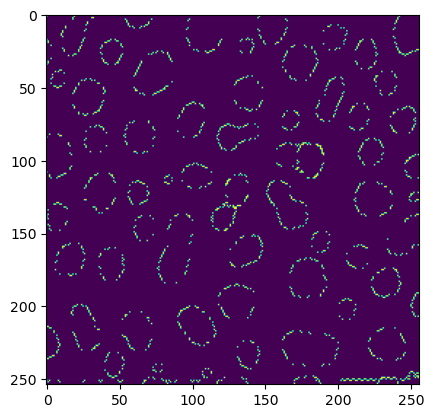

In [9]:
masks = results_base_blob[0].masks # Masks are an element of the results, this extracts them
array_shape = [masks.shape[1], masks.shape[2]] # Getting the 2D shape
outline_image = np.zeros(array_shape, dtype=np.uint32) # creating a binary image for the outlines.
label_image = np.zeros(array_shape, dtype=np.int32) # creating a label image

def make_label_image(label_image, masks):
    '''
    Creates a label image by adding one mask at a time onto an empty image.
    
    Inputs:
    - A label image of zeros, in the same size and shape of your original image.
    - A list of masks from an ultralytics segmentation
    Outputs:
    - A label-image of all masks
    '''
    for enum, mask in enumerate(masks): 
        curr_label = mask.data.cpu().numpy() # Converting from tensors to a numpy compatible array on the CPU
        mnarray = curr_label.squeeze() # reduce each mask into 2D array
        label_image[mnarray] = enum + 1 # set each mask to a unique ID (enum)

    return(label_image)

def visualize_outlines(outline_image, masks):
    '''
    Creates a binary outline by adding one outline at a time onto an empty image.
    
    Inputs:
    - A label image of zeros, in the same size and shape of your original image.
    - A list of masks from an ultralytics segmentation
    Outputs:
    - A binary image circumscribing the mask
    '''
    for enum, mask in enumerate(masks): # iterate over each mask
        for x,y in mask.xy[0]:
            outline_image[y.astype("int"),x.astype("int")] = 255
    return(outline_image)

label_image = make_label_image(label_image, masks)
outline_image = visualize_outlines(outline_image, masks)

plt.imshow(outline_image)

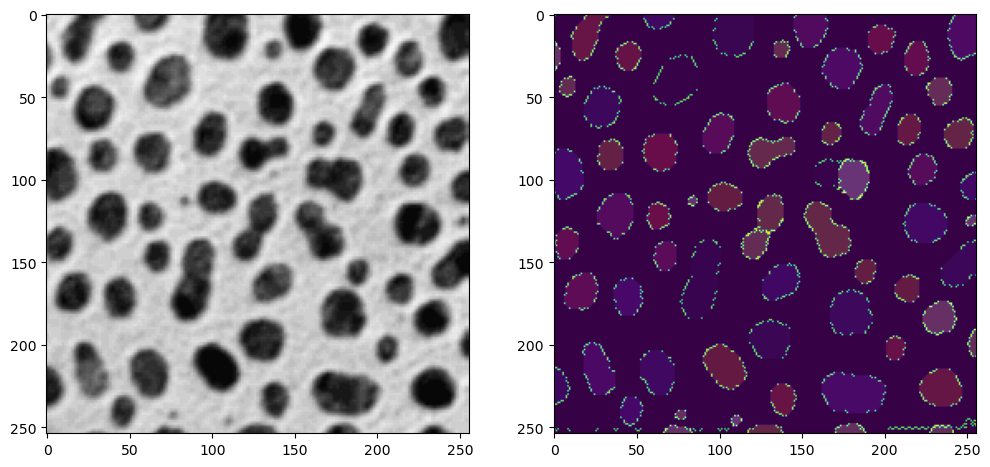

In [11]:
orig_image=plt.imread("blobs.png")
fig, axs = plt.subplots(1,2,figsize=(12,12))
axs[0].imshow(orig_image, cmap='gray', vmin=0, vmax=65536)
axs[1].imshow(label_image, cmap="CMRmap") # label_image is exportable 
axs[1].imshow(outline_image, alpha = 0.8) # Adds on segmentation boundaries, comment out for only the image
#axs[1,0].imshow(orig_image, cmap='gray', vmin=0, vmax=65536)
#axs[1,0].imshow(outline_image, cmap='gray', alpha=0.7)

In [12]:
plt.imsave("label_image.png", label_image) # This can be imported directly into FIJI/ImageJ and converted to ROIs with a tool like "Label Image to ROIs"